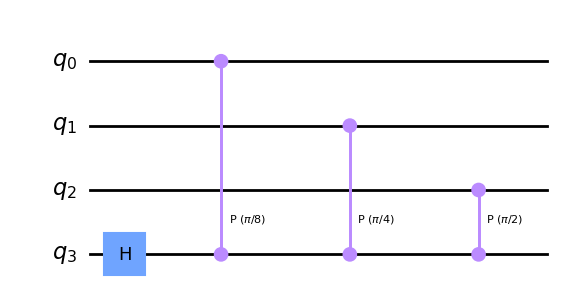

In [3]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

qc = QuantumCircuit(4)

qc.h(2)
qc.draw()

qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw()

qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.draw()

qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw()

qc.swap(0,2)
qc.draw()

def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)
        
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()        
